<a href="https://colab.research.google.com/github/PiotrTyrakowski/deep-learning-tf2.keras/blob/test/rozdzia%C5%82_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST sampler

Etykiety zbioru uczącego:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Etykiety zbioru testowego:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


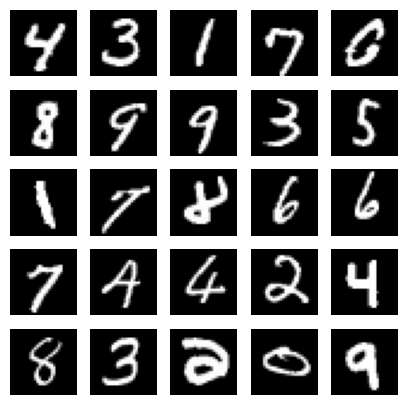

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# załadowanie zbioru
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#zliczenie liczby unikalnych etykiet w zbiorze uczącym
unique, counts = np.unique(y_train, return_counts=True)
print("Etykiety zbioru uczącego: ", dict(zip(unique, counts)))

# zliczenie liczby unikalnych etykiet w zbiorze testowym

unique, counts = np.unique(y_test, return_counts=True)
print("Etykiety zbioru testowego: ", dict(zip(unique, counts)))

# próbka 25 cyfre ze zbioru ucząćego MNIST
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# wyświetlenie 25 cyfr MNIST
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.savefig("mist-samples.png")
plt.show()
plt.close('all')



# MPL MNIST

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# załadowanie zbioru MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Zliczenie liczby etykiet
num_labels = len(np.unique(y_train))

# konwersja na wektor "jeden-aktywny" (OH)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# wymiary obrazów (przy założeniu, że są kwadratami)
image_size = x_train.shape[1]
input_size = image_size * image_size

# zmiana rozmiaru i normalizacja
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# parametry sieci
batch_size = 128
hidden_units = 256
dropout = 0.45

# modelem jest trójwarswowy MLP z ReLU i pomijaniem (ang. dropout) w każdej warstwie
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# to jest wyjście dla wektora "jeden-aktywny"
model.add(Activation('softmax'))
model.summary()

plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# funkcja straty dla wektora OH, optymalizator Adam
# dokładność jest odpowiednią miarą do oceny jakości klasyfikatora
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# trenowanie sieci
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# sprawdzanie poprawności działania modelu na zbiorze testowym, by ocenić zdolność uogólniania
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size,
                        verbose=0)
print("\nDokładność na zbiorze testowym: %.1f%%" % (100.0 * acc))


11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                         